In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',100)
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from sklearn.decomposition import PCA


In [660]:
housing = pd.read_csv(r"C:\Users\Admin\Downloads\newhousing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [661]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi-furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.3 KB


In [662]:
housing.duplicated().value_counts()

False    545
Name: count, dtype: int64

In [663]:
dummy=pd.get_dummies(housing[['bedrooms','bathrooms','stories','parking']],columns=(['bedrooms','bathrooms','stories','parking']),drop_first=True).astype(int)
housing.drop(['bedrooms','bathrooms','stories','parking'],axis=1,inplace=True)
housing=pd.concat((housing,dummy),axis=1)


In [664]:
X=housing.iloc[:,1:]
y=housing.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.3)

In [665]:
scaler=StandardScaler()
X_train[['area','areaperbedroom','bbratio']]=scaler.fit_transform(X_train[['area','areaperbedroom','bbratio']])
X_test[['area','areaperbedroom','bbratio']]=scaler.transform(X_test[['area','areaperbedroom','bbratio']])
y_train=scaler.fit_transform(y_train.values.reshape(-1,1))
y_test=scaler.transform(y_test.values.reshape(-1,1))
X.head()

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
0,5500,1,0,1,0,0,0,1,0,1833.333333,0.666667,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,4040,1,0,0,0,0,0,1,0,1346.666667,0.333333,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,3640,1,0,0,0,0,0,0,1,1820.000000,0.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3040,0,0,0,0,0,0,0,1,1520.000000,0.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4500,0,0,0,0,0,0,0,0,2250.000000,0.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [666]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
mod1=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("coeffs:",lr.coef_)
print("\n\n")
print("intercepts:",lr.intercept_)
print("\n\n")
mean_squared_error(y_test,y_pred)
print("mse:",mean_squared_error(y_test,y_pred))
print("\n\n")
print("r2_score:",r2_score(y_test,y_pred))
print("\n\n")

coeffs: [[ 0.48037028  0.15594825  0.11181867  0.17412303  0.39609038  0.46240174
   0.42628008  0.00389782 -0.16336457 -0.20746549 -0.11192359 -0.89935312
  -1.13036939 -1.23439887 -1.49668625 -1.37272421  0.77989937  1.60922771
   3.33566094  0.17604982  0.48220788  0.78312057  0.1896629   0.27785252
   0.02225944]]



intercepts: [0.21031275]



mse: 0.34023781447457446



r2_score: 0.6562355774507806





In [667]:
pca=PCA(random_state=100)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)
mod_pca_1=pca.fit(X_train,y_train)

In [668]:
variance_df=pd.DataFrame()
variance_df['Explain_variance_ratio']=pca.explained_variance_ratio_*100
variance_df['features']=X_train.columns
varinace_df=variance_df.sort_values(by='Explain_variance_ratio')
variance_df

,Explain_variance_ratio,features
0,32.514687,area
1,18.468423,mainroad
2,9.125724,guestroom
3,5.919017,basement
4,5.360180,hotwaterheating
5,4.295941,airconditioning
6,4.058101,prefarea
7,3.452973,semi-furnished
8,2.896683,unfurnished
9,2.449257,areaperbedroom


In [669]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8],
                       'PC10':pca.components_[9],'PC11':pca.components_[10],'PC12':pca.components_[11],
                       'PC13':pca.components_[12],'PC14':pca.components_[13],'PC15':pca.components_[14],
                       'PC16':pca.components_[15],'PC17':pca.components_[16],'PC18':pca.components_[17],
                       'PC19':pca.components_[18],'PC20':pca.components_[19],'PC21':pca.components_[20],
                       'PC22':pca.components_[21],'PC23':pca.components_[22],'PC24':pca.components_[23],
                       'PC25':pca.components_[24],'Feature':X.columns })
components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,Feature
0,0.656965,-0.285092,-0.250370,0.010921,0.297832,-0.108870,0.001690,0.013293,-0.104440,-0.169077,-0.096159,-0.019970,-0.008100,-0.031033,0.034586,0.254333,0.235154,0.132734,-0.028807,0.012079,-0.350412,0.074196,0.006813,-0.071928,0.011102,area
1,0.086276,-0.025488,-0.063130,-0.021456,0.011501,0.070833,-0.085217,-0.011183,-0.076861,0.508446,0.440526,0.427159,-0.468533,-0.289305,-0.003485,0.117826,0.040054,0.065129,-0.087618,-0.051218,0.023886,-0.000863,-0.011402,0.002327,-0.001785,mainroad
2,0.032453,0.001498,-0.137891,-0.132041,-0.032820,0.254407,0.154663,0.147901,0.163878,-0.207019,0.177422,0.615651,0.591261,-0.125393,0.019316,-0.029858,-0.004470,0.037303,-0.034102,0.033041,0.015881,0.013413,-0.001784,0.001963,0.000306,guestroom
3,0.014448,-0.017187,-0.215159,-0.096273,-0.160501,0.607840,0.499519,0.055233,0.007856,-0.258575,0.056999,-0.200191,-0.387269,-0.032478,0.112872,0.029002,-0.030765,-0.045605,0.133256,0.007831,-0.017389,-0.008898,0.004930,0.001845,0.004296,basement
4,-0.008782,0.012029,-0.025685,0.023698,-0.000481,-0.055993,0.032102,0.037899,-0.051146,0.021314,0.123660,0.006254,0.029199,0.044795,0.200090,-0.180525,0.609063,-0.723006,-0.040768,-0.058503,0.001326,-0.010375,0.011874,-0.005081,-0.003518,hotwaterheating
5,0.056377,-0.020213,-0.205622,-0.146498,0.024539,0.286293,-0.440700,0.032884,0.739460,0.172937,-0.171953,-0.139217,-0.045861,0.030339,0.078463,0.011158,0.067542,-0.033386,-0.118682,-0.003252,0.002947,-0.005938,0.003738,-0.003862,-0.000247,airconditioning
6,0.061567,-0.067700,-0.149677,-0.152354,-0.118673,0.298117,0.024389,0.249732,-0.397387,0.569607,-0.344162,-0.184362,0.314676,-0.089361,-0.184726,-0.032211,0.043403,-0.026047,-0.007285,0.014817,0.016693,0.001167,0.001513,0.001654,-0.000026,prefarea
7,-0.002606,-0.034092,-0.279448,0.502528,-0.455700,-0.161520,-0.064404,-0.017524,0.049144,-0.090224,-0.114533,-0.096244,0.063555,-0.605211,0.155247,-0.012894,-0.001994,0.016261,-0.011868,0.026383,0.033526,0.015419,-0.000135,0.002231,0.001722,semi-furnished
8,-0.036801,0.008237,0.340691,-0.429937,0.369931,-0.014550,0.048883,-0.056769,0.008432,-0.074348,-0.089779,-0.169614,0.032593,-0.671385,0.220220,-0.077836,-0.030723,-0.033213,-0.016039,0.035884,0.047916,0.014892,-0.008031,0.002909,0.001392,unfurnished
9,0.686713,-0.065654,0.318455,0.048921,-0.205822,-0.010344,0.112614,-0.042342,0.131012,0.084094,-0.004453,0.018951,-0.003270,0.057905,0.006153,-0.319295,-0.254095,-0.150587,0.049919,-0.037224,0.362227,-0.072876,-0.003343,0.074678,-0.013140,areaperbedroom


<function matplotlib.pyplot.show(close=None, block=None)>

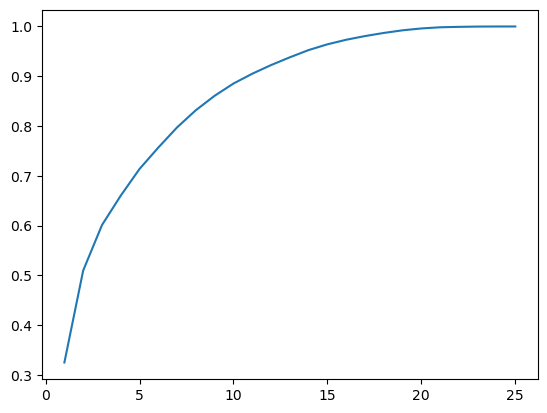

In [670]:
plt.plot([i for i in range(1,26)],np.cumsum(pca.explained_variance_ratio_))
plt.show

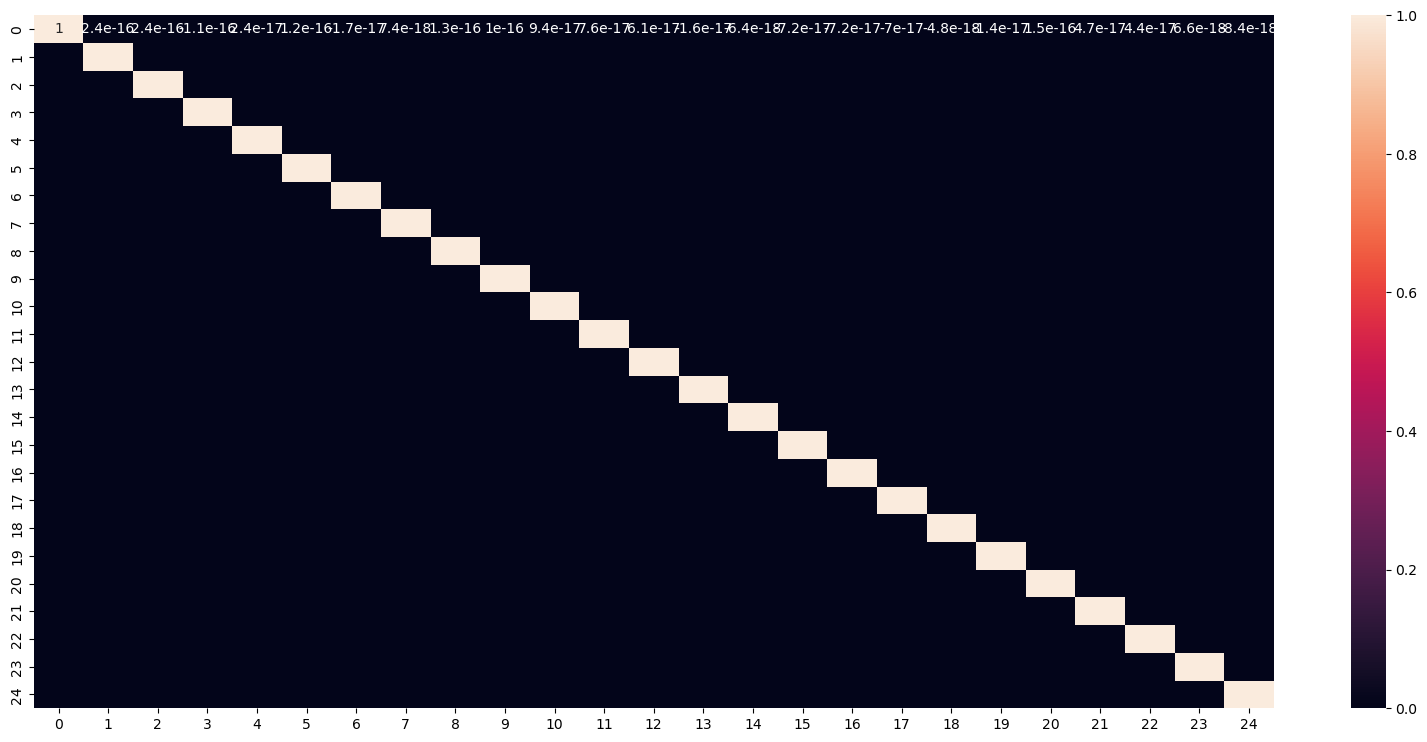

In [671]:
plt.figure(figsize=(20,9))
sns.heatmap(np.corrcoef(X_train_trf.T),annot=True)
plt.show()

In [672]:
lr.fit(X_train_trf,y_train)
y_pred=lr.predict(X_test_trf)

In [673]:
print("coeffs:",lr.coef_)
print("\n\n")
print("intercepts:",lr.intercept_)
print("\n\n")
print("r2_score:",r2_score(y_test,y_pred))
print("\n\n")
print("mse:",mean_squared_error(y_test,y_pred))

coeffs: [[ 3.29362719e-01  3.68581888e-02 -7.86472854e-01 -1.20056945e-01
   2.94914466e-01  2.40648581e-01 -3.52056019e-01  2.71799418e-01
   5.48688251e-02  2.64970602e-01  5.89658994e-02 -8.97863356e-02
   1.14510201e-01 -3.48690001e-02  1.17863667e-03  3.90540167e-01
   3.65126613e-01 -4.17952686e-01  7.34585926e-01  1.72488715e-01
  -2.03421530e-01  2.55612476e-01 -4.48528770e-02  2.44770728e+00
   3.95825957e+00]]



intercepts: [-8.65964304e-17]



r2_score: 0.6562355774507795



mse: 0.3402378144745755


In [674]:
pca=PCA(random_state=100,n_components=22)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)
mod_pca_2=pca.fit(X_train_trf,y_train)



In [675]:
mod_final=lr.fit(X_train_trf,y_train)
y_pred=mod_final.predict(X_test_trf)

In [676]:
print("coeffs:",lr.coef_)
print("\n\n")
print("intercepts:",lr.intercept_)
print("\n\n")
print("r2_score:",r2_score(y_test,y_pred))
print("\n\n")
print("mse:",mean_squared_error(y_test,y_pred))

coeffs: [[ 0.32936272  0.03685819 -0.78647285 -0.12005694  0.29491447  0.24064858
  -0.35205602  0.27179942  0.05486883  0.2649706   0.0589659  -0.08978634
   0.1145102  -0.034869    0.00117864  0.39054017  0.36512661 -0.41795269
   0.73458593  0.17248871 -0.20342153  0.25561248]]



intercepts: [-7.25402657e-17]



r2_score: 0.6443550556252671



mse: 0.35199645648515493
